In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Load dataset with appropriate encoding
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Combine actor columns into a single 'Actors' feature
df['Actors'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']

# Drop rows with missing values in important columns
df.dropna(subset=['Genre', 'Director', 'Actors', 'Rating'], inplace=True)

# Define feature columns and target column
features = ['Genre', 'Director', 'Actors']
target = 'Rating'

X = df[features]
y = df[target]

# One-hot encode the categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)]
)
X_encoded = preprocessor.fit_transform(X).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Define a neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate model performance
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 18.4275 - val_loss: 1.6843
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.9867 - val_loss: 1.6220
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3314 - val_loss: 1.6005
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1741 - val_loss: 1.6339
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1416 - val_loss: 1.6073
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1256 - val_loss: 1.5876
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1314 - val_loss: 1.6420
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1192 - val_loss: 1.6106
Epoch 9/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1006 - val_loss: 1.6125
Epoch 10/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0859 - val_loss: 1.6147
Epoch 11/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0770 - val_loss: 1.6129
Epoch 12/30
171/171 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Define prediction as correct if within 0.5 of actual rating
accuracy = np.mean(np.abs(y_test - y_pred) <= 0.5)
print("Custom Accuracy (within ±0.5 rating):", accuracy)


Custom Accuracy (within ±0.5 rating): 0.2996031746031746


Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - val_loss: 1.6012
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0230 - val_loss: 1.6195
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0270 - val_loss: 1.5868
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0259 - val_loss: 1.5844
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0245 - val_loss: 1.5981
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0226 - val_loss: 1.5951
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - val_loss: 1.5919
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0194 - val_loss: 1.5823
Epoch 9/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0195 - val_loss: 1.6443
Epoch 10/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0246 - val_loss: 1.6051
Epoch 11/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0261 - val_loss: 1.6189
Epoch 12/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 

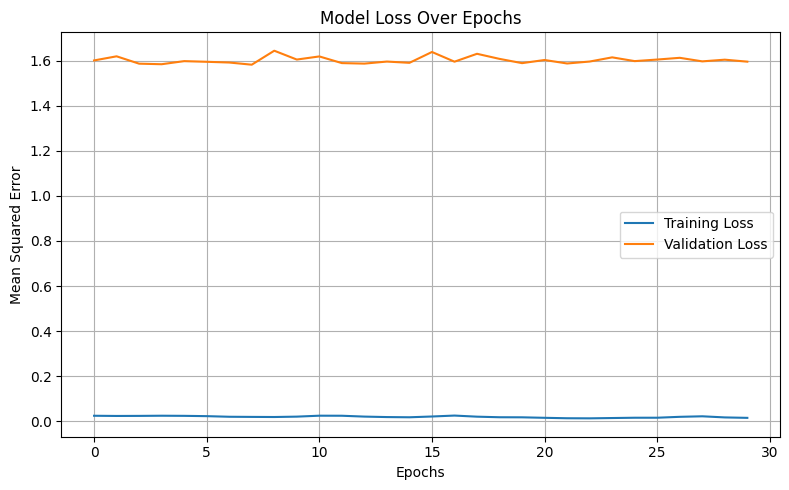

In [ ]:
import matplotlib.pyplot as plt

# Assuming you store the training history
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1  # Hide verbose output
)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


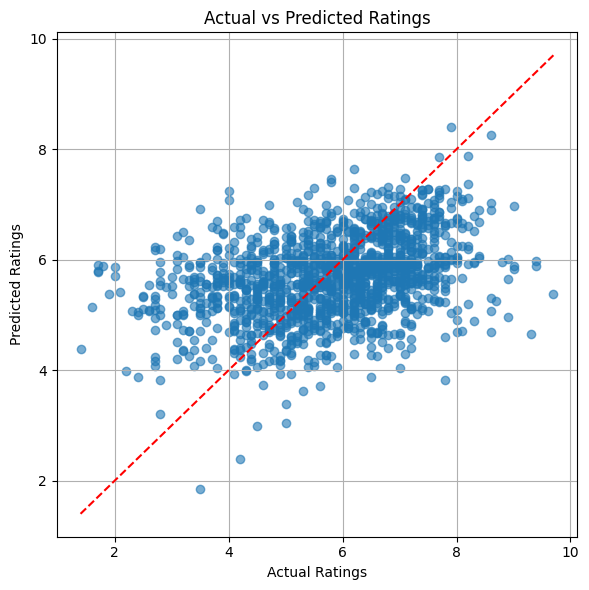

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


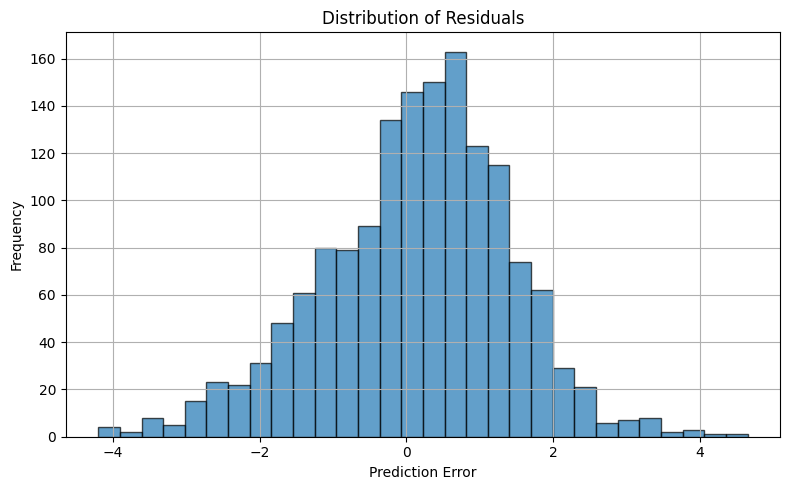

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save('movie_rating_model.h5')
print("Model saved as movie_rating_model.h5")

Model saved as movie_rating_model.h5
